In [3]:
import numpy as np
import quantumWalkUtility
import matplotlib as plt
plt.style.use(['default'])

時刻依存型の量子ウォーク

時間発展ルールが時刻に対して周期的に変化するような時刻依存型の量子ウォークを考えてみる

### 3周期で変化する場合
$\vec{\psi}_{t+1}(x)=\left\{\begin{array}{ll}P_{1} \vec{\psi}_{t}(x+1)+Q_{1} \vec{\psi}_{t}(x-1) & (t=0,3,6, \ldots) \\ P_{2} \vec{\psi}_{t}(x+1)+Q_{2} \vec{\psi}_{t}(x-1) & (t=1,4,7, \ldots) \\ P_{3} \vec{\psi}_{t}(x+1)+Q_{3} \vec{\psi}_{t}(x-1) & (t=2,5,8, \ldots)\end{array}\right.$

$P_{1}=P_{2}=\left[\begin{array}{cc}\cos \theta & \sin \theta \\ 0 & 0\end{array}\right], \quad Q_{1}=Q_{2}=\left[\begin{array}{cc}0 & 0 \\ \sin \theta & -\cos \theta\end{array}\right]$
$P_{3}=\left[\begin{array}{cc}1 & 0 \\ 0 & 0\end{array}\right], \quad Q_{3}=\left[\begin{array}{cc}0 & 0 \\ 0 & 1\end{array}\right]$


### 実験8

### 実験内容：
$\theta=\frac{\pi}{4}$

$P_{3}=\left[\begin{array}{cc}1 & 0 \\ 0 & 0\end{array}\right], \quad Q_{3}=\left[\begin{array}{cc}0 & 0 \\ 0 & 1\end{array}\right]$


### 実験8-1
$\psi_0(0)=\left[\begin{matrix} 1 \\ 0 \end{matrix}\right]$,
$\psi_t(x)=\left[\begin{matrix} 0  \\ 0  \end{matrix}\right]$ $(x\neq0)$

### 実験8-2
$\psi_0(0)=\left[\begin{matrix} 0 \\ 1 \end{matrix}\right]$,
$\psi_t(x)=\left[\begin{matrix} 0  \\ 0  \end{matrix}\right]$ $(x\neq0)$

### 実験8-3
$\psi_0(0)=\left[\begin{matrix} \frac{1}{\sqrt{2}}  \\ \frac{i}{\sqrt{2}}  \end{matrix}\right]$
$\psi_t(x)=\left[\begin{matrix} 0\\ 0 \end{matrix}\right]$ $(x\neq0)$

### 実験結果



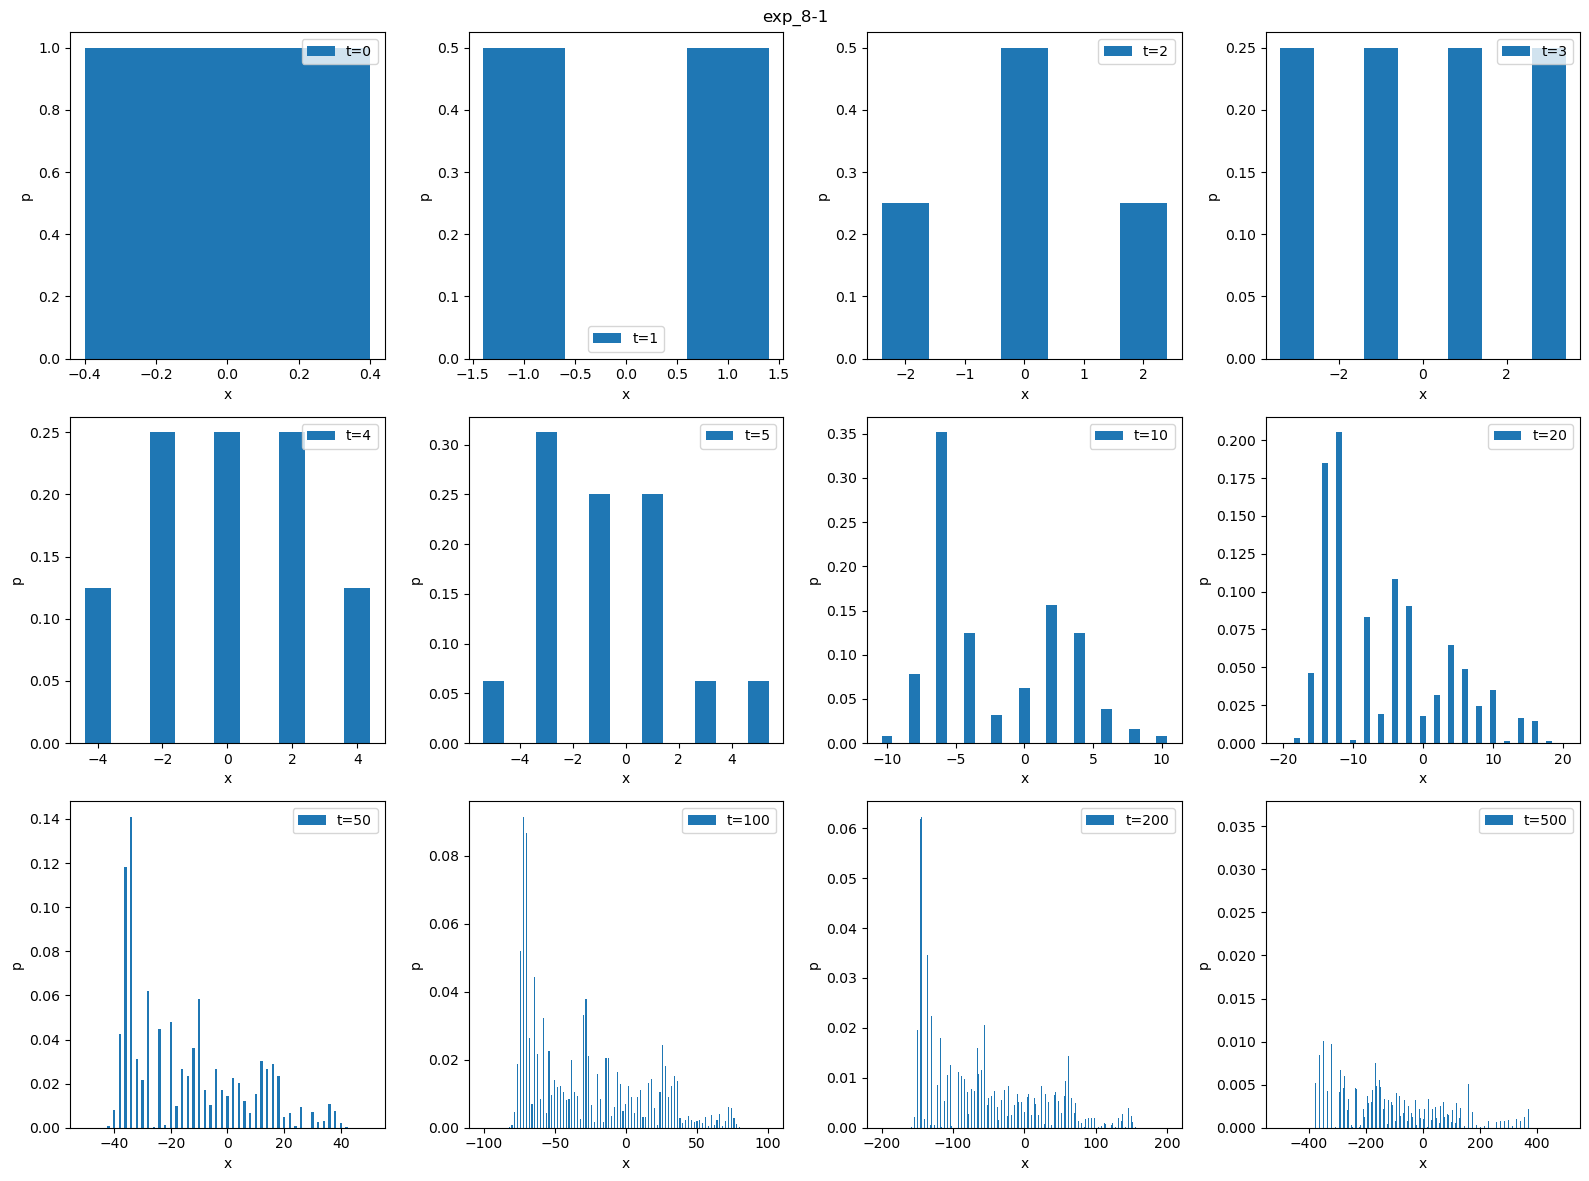

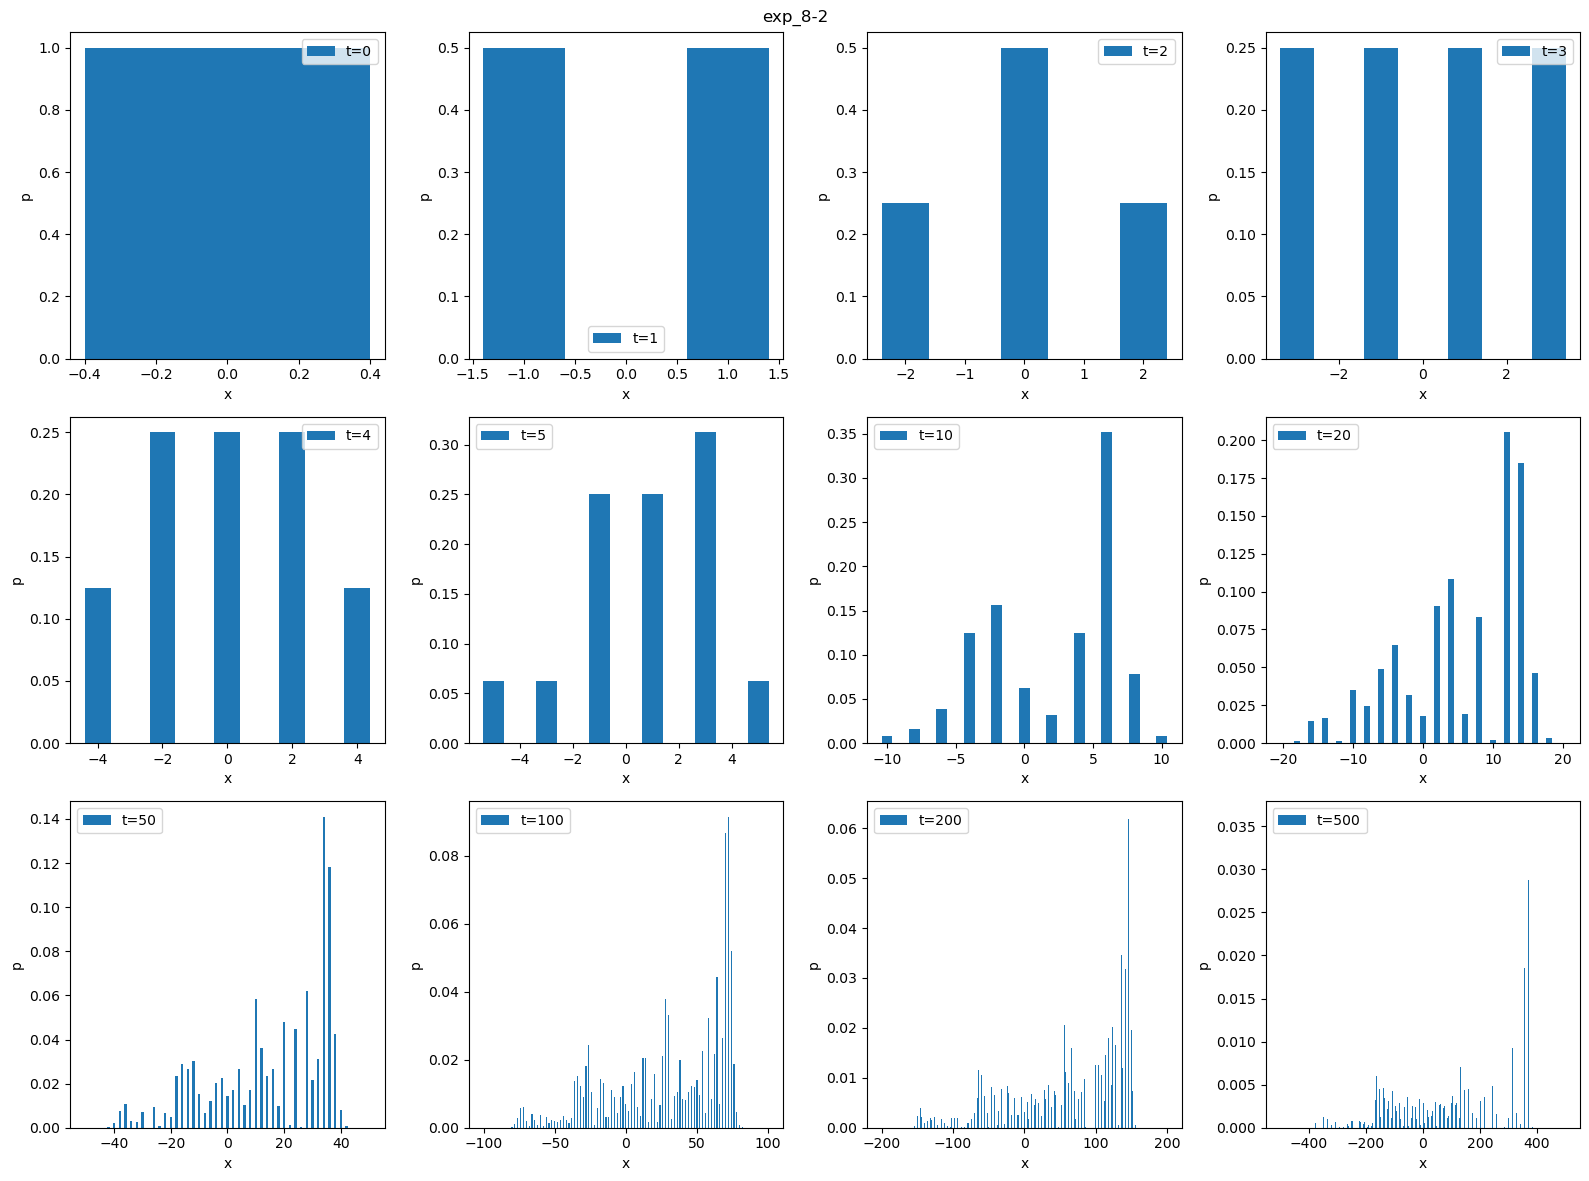

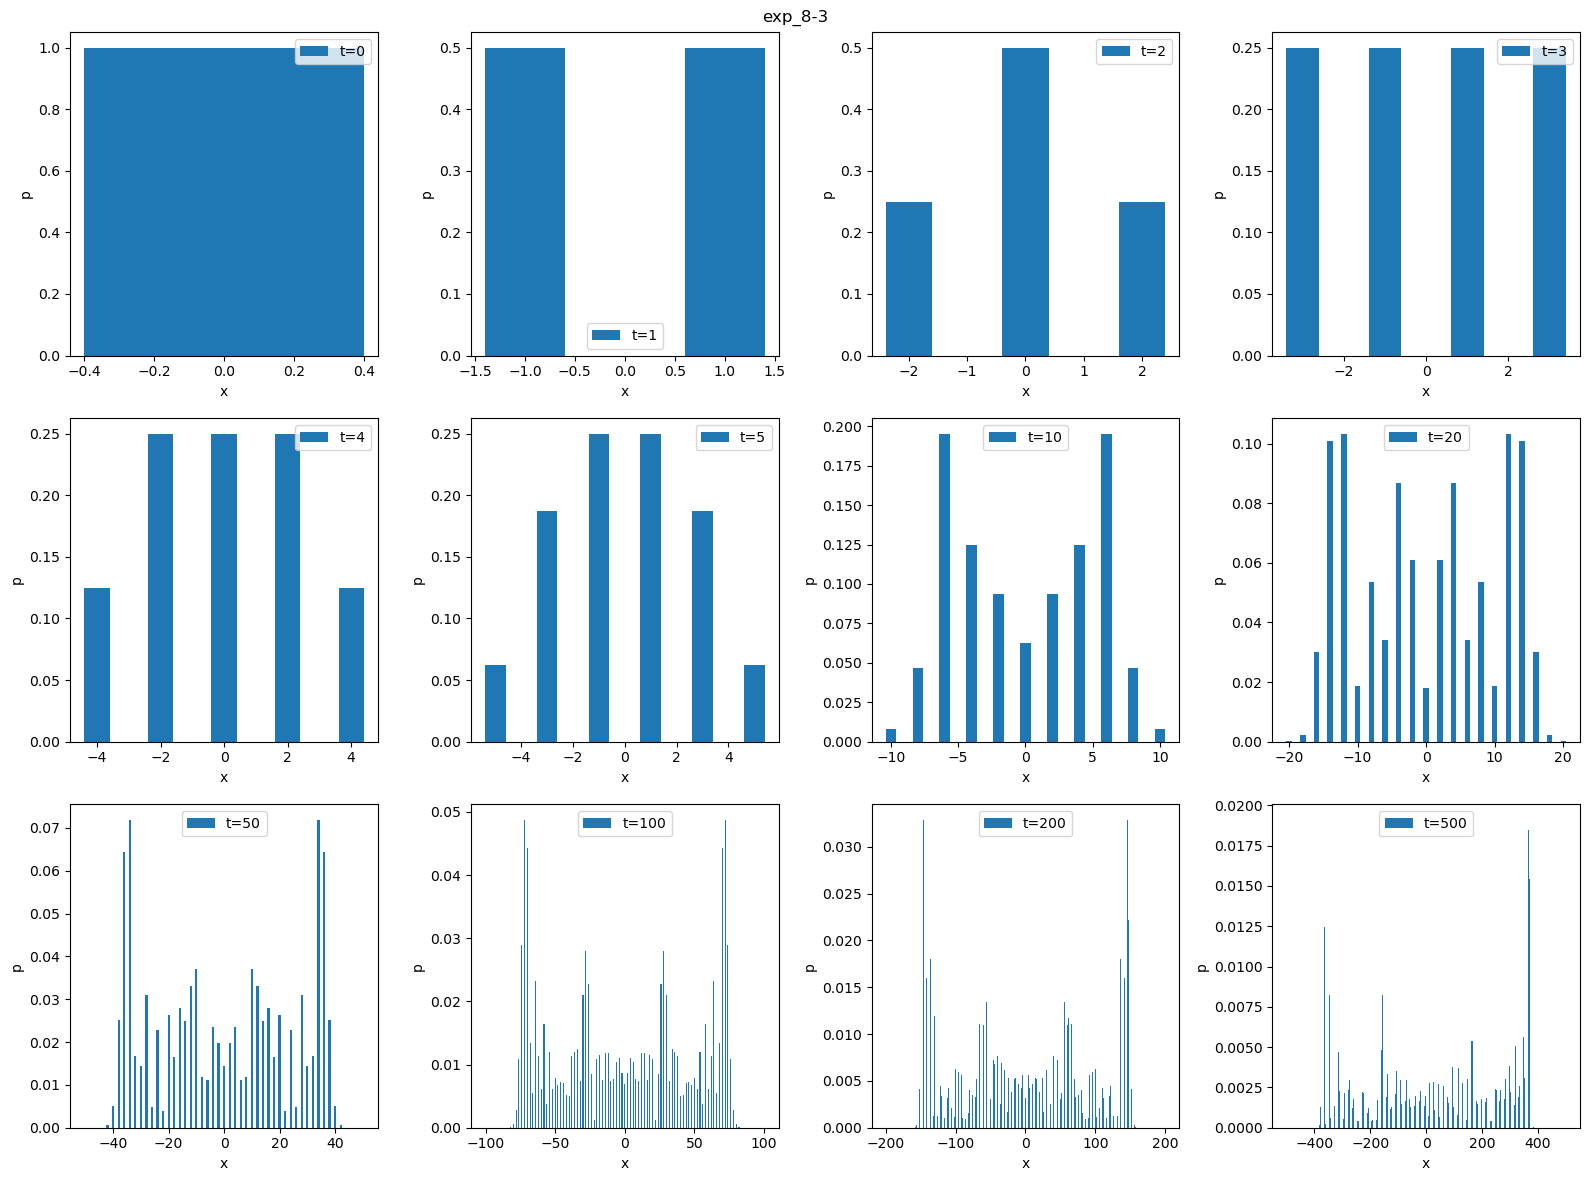

In [5]:
def exp_8(exp_code_chapter,PSY_init,description):
    """実験結果保存設定"""
    exp_code = "exp_8"
    folder_name, fig_title_name, file_name = quantumWalkUtility.save_setting(exp_code,exp_code_chapter,description)

    """実験"""
    # 最大時間発展T(t=0〜t=Tまで時間発展させる。t=Tを求めるにはT+1まで計算する必要があるため内部ではT+1まで計算している)
    T = 500
    # P,Q
    theta_list = [3 * np.pi / 12, 3 * np.pi / 12]
    P_list=[]
    Q_list=[]
    for theta in theta_list:
        P = np.array([[np.cos(theta), np.sin(theta)], [0, 0]], dtype=np.complex128)
        Q = np.array([[0, 0], [np.sin(theta), -np.cos(theta)]], dtype=np.complex128)
        P_list.append(P)
        Q_list.append(Q)

    P = np.array([[1, 0], [0, 0]], dtype=np.complex128)
    Q = np.array([[0, 0], [0, 1]], dtype=np.complex128)
    P_list.append(P)
    Q_list.append(Q)

    # 初期確率振幅ベクトル[時間×距離(-T〜T)×2次元ベクトル] x+1やx-1があるので、一つ余分に領域をとっておく
    PSY = np.zeros([T+1, 2 * (T + 1) + 1, 2], dtype=np.complex128)
    # PSY_init = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])
    PSY[0, 0] = PSY_init
    PSY = quantumWalkUtility.quantum_walk_1d_3phase(T, P_list, Q_list, PSY)

    """プロット及び保存"""
    # plotしたい時間t。
    plots_t = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500]
    # 1つのグラフ内に複数のグラフを表示させる場合、一列（行）に何個グラフを表示させるようにするか？
    plot_graph_num_by_axis_row = 3
    plot_graph_num_by_axis_col = 4
    # グラフの種類
    graph_type = "棒グラフ"
    quantumWalkUtility.do_plot(folder_name, fig_title_name, file_name, plots_t, plot_graph_num_by_axis_row,
                plot_graph_num_by_axis_col,
                False, graph_type, PSY)

PSY_init = np.array([1, 0])
exp_8(exp_code_chapter=1,PSY_init=PSY_init,description="確率分布の時間発展1")

PSY_init = np.array([0, 1])
exp_8(exp_code_chapter=2,PSY_init=PSY_init,description="確率分布の時間発展2")

PSY_init = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])
exp_8(exp_code_chapter=3,PSY_init=PSY_init,description="確率分布の時間発展3")

### 実験8

### 実験内容：
$\theta=\frac{\pi}{4}$

$P_{3}=\left[\begin{array}{cc}1 & 0 \\ 0 & 0\end{array}\right], \quad Q_{3}=\left[\begin{array}{cc}0 & 0 \\ 0 & 1\end{array}\right]$


### 実験8-1
$\psi_0(0)=\left[\begin{matrix} 1 \\ 0 \end{matrix}\right]$,
$\psi_t(x)=\left[\begin{matrix} 0  \\ 0  \end{matrix}\right]$ $(x\neq0)$

### 実験8-2
$\psi_0(0)=\left[\begin{matrix} 0 \\ 1 \end{matrix}\right]$,
$\psi_t(x)=\left[\begin{matrix} 0  \\ 0  \end{matrix}\right]$ $(x\neq0)$

### 実験8-3
$\psi_0(0)=\left[\begin{matrix} \frac{1}{\sqrt{2}}  \\ \frac{i}{\sqrt{2}}  \end{matrix}\right]$
$\psi_t(x)=\left[\begin{matrix} 0\\ 0 \end{matrix}\right]$ $(x\neq0)$

### 実験結果



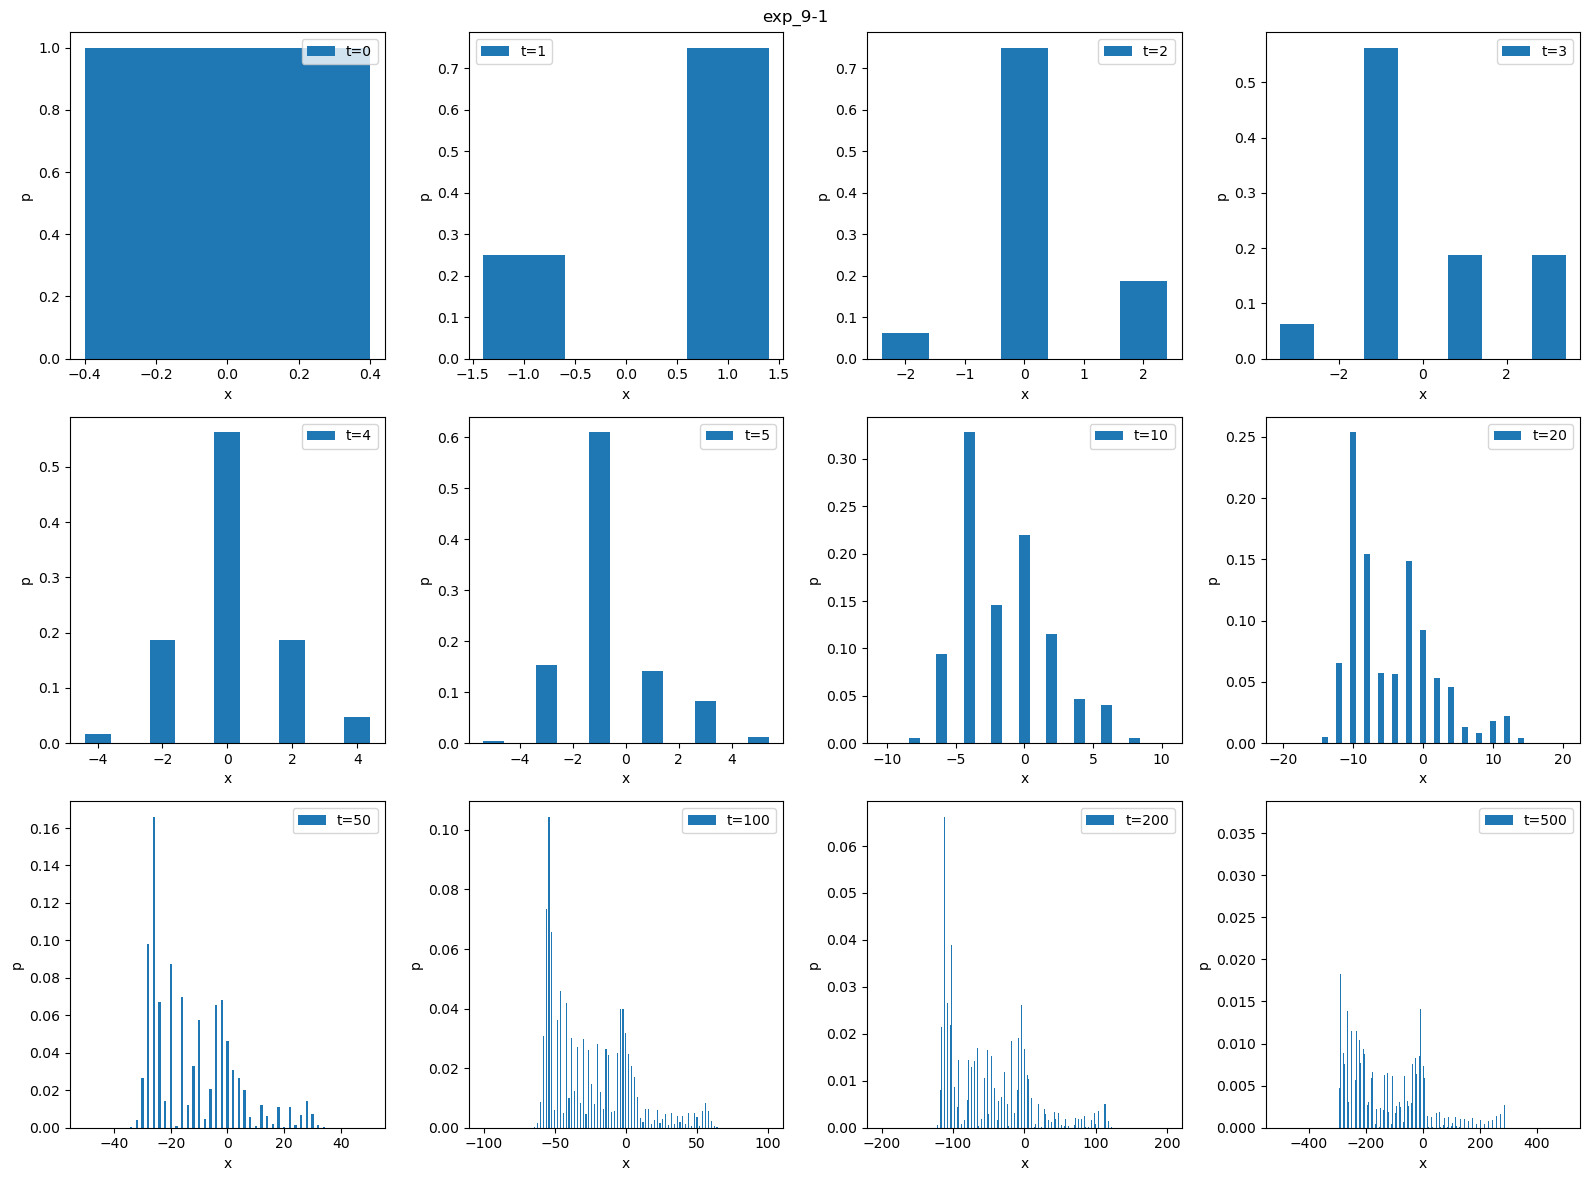

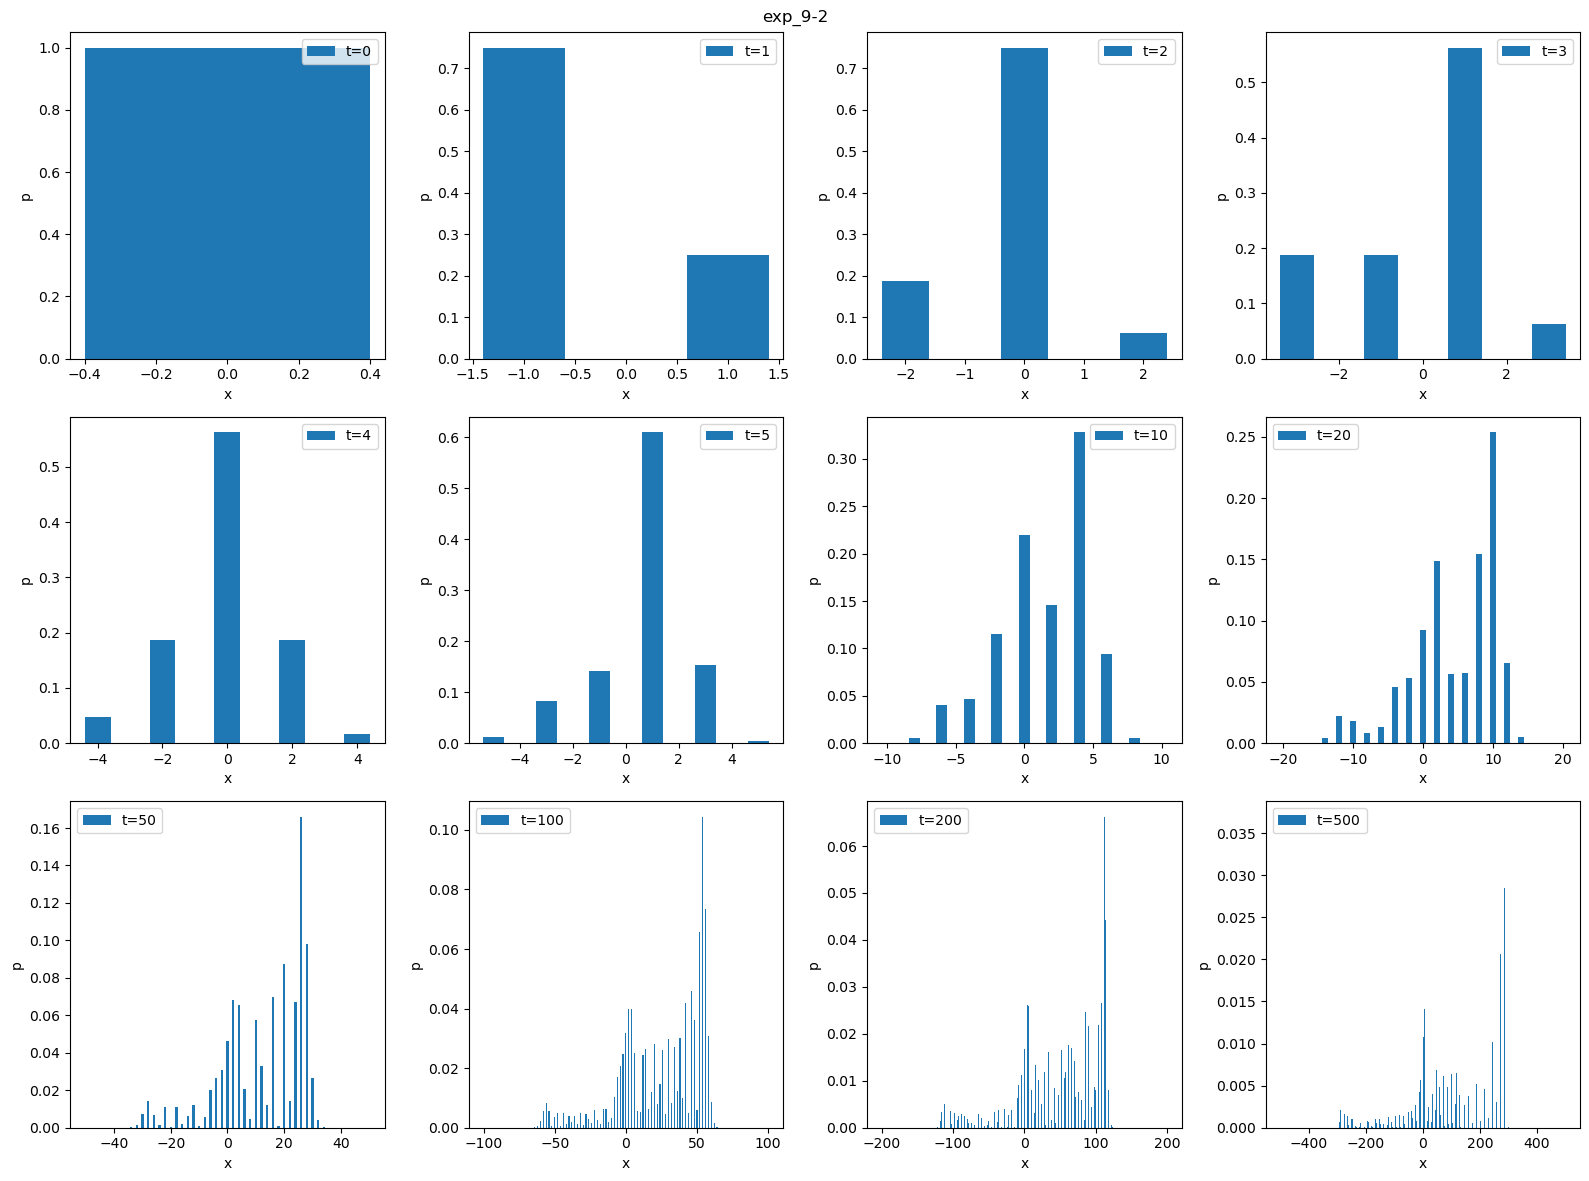

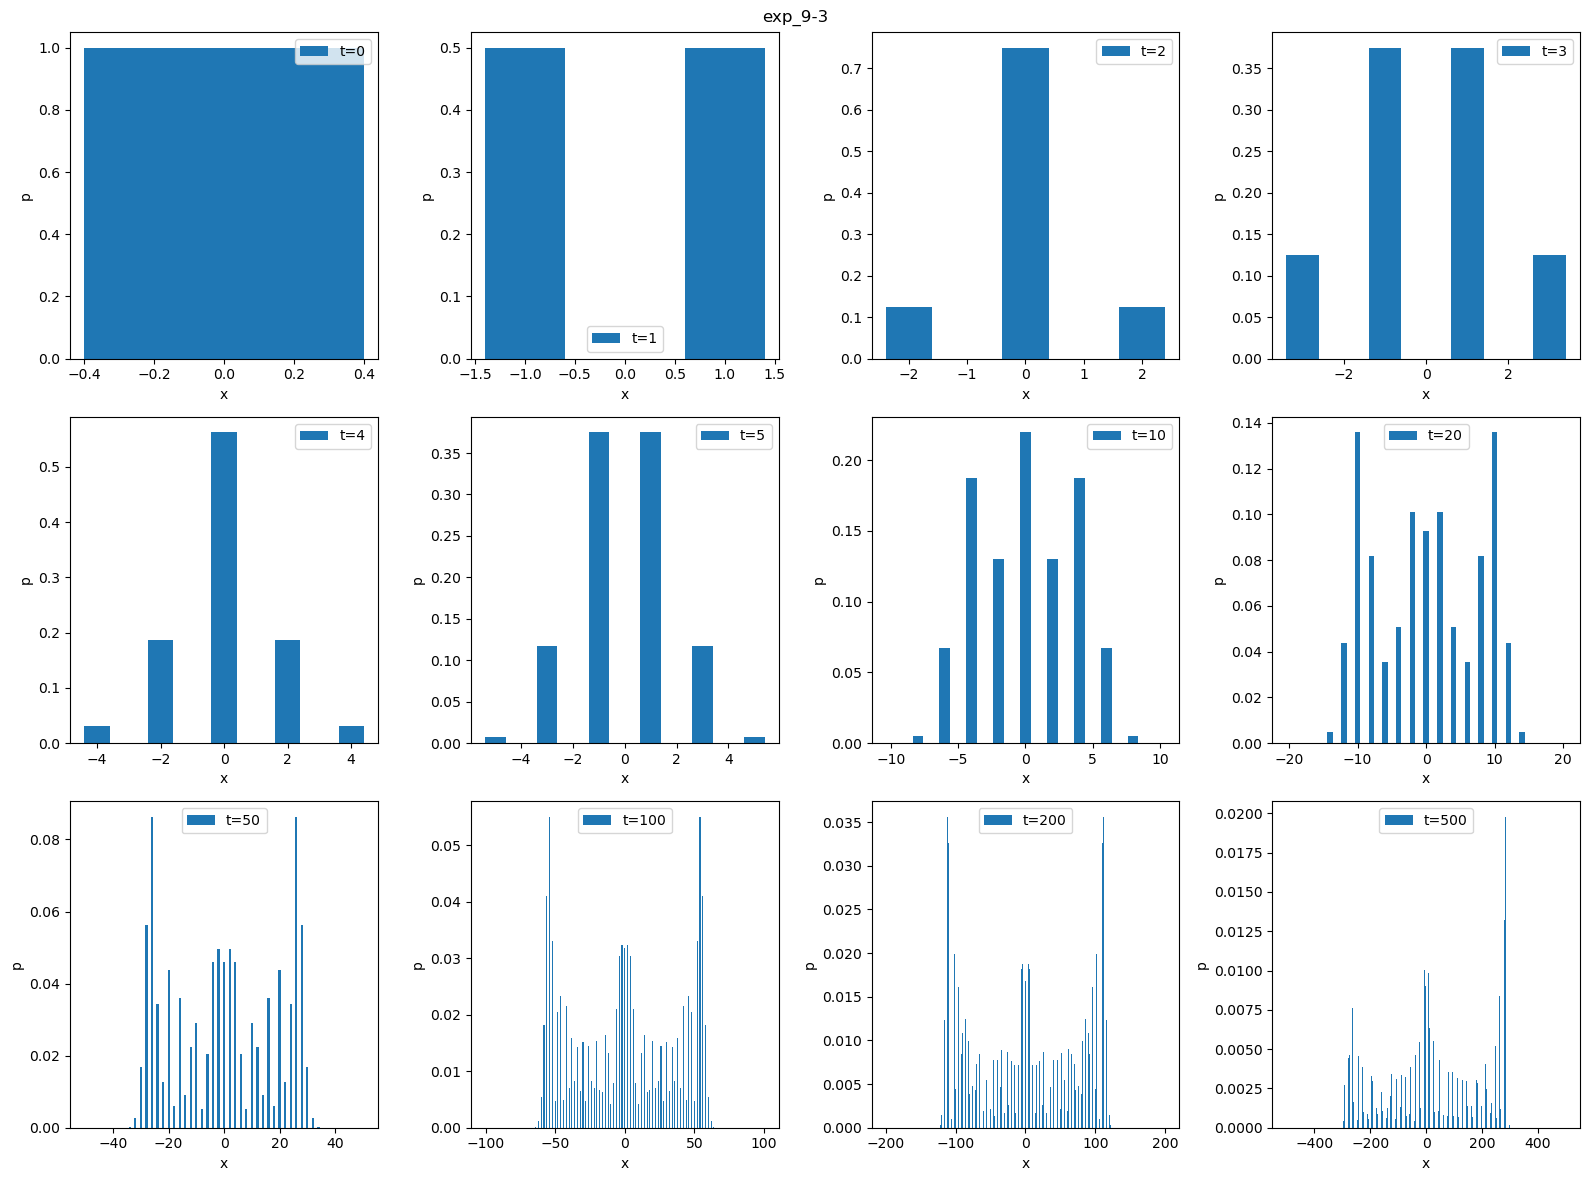

In [6]:
def exp_9(exp_code_chapter,PSY_init,description):
    """実験結果保存設定"""
    exp_code = "exp_9"
    folder_name, fig_title_name, file_name = quantumWalkUtility.save_setting(exp_code,exp_code_chapter,description)

    """実験"""
    # 最大時間発展T(t=0〜t=Tまで時間発展させる。t=Tを求めるにはT+1まで計算する必要があるため内部ではT+1まで計算している)
    T = 500
    # P,Q
    theta_list = [4 * np.pi / 12, 4 * np.pi / 12]
    P_list=[]
    Q_list=[]
    for theta in theta_list:
        P = np.array([[np.cos(theta), np.sin(theta)], [0, 0]], dtype=np.complex128)
        Q = np.array([[0, 0], [np.sin(theta), -np.cos(theta)]], dtype=np.complex128)
        P_list.append(P)
        Q_list.append(Q)

    P = np.array([[1, 0], [0, 0]], dtype=np.complex128)
    Q = np.array([[0, 0], [0, 1]], dtype=np.complex128)
    P_list.append(P)
    Q_list.append(Q)

    # 初期確率振幅ベクトル[時間×距離(-T〜T)×2次元ベクトル] x+1やx-1があるので、一つ余分に領域をとっておく
    PSY = np.zeros([T+1, 2 * (T + 1) + 1, 2], dtype=np.complex128)
    # PSY_init = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])
    PSY[0, 0] = PSY_init
    PSY = quantumWalkUtility.quantum_walk_1d_3phase(T, P_list, Q_list, PSY)

    """プロット及び保存"""
    # plotしたい時間t。
    plots_t = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500]
    # 1つのグラフ内に複数のグラフを表示させる場合、一列（行）に何個グラフを表示させるようにするか？
    plot_graph_num_by_axis_row = 3
    plot_graph_num_by_axis_col = 4
    # グラフの種類
    graph_type = "棒グラフ"
    quantumWalkUtility.do_plot(folder_name, fig_title_name, file_name, plots_t, plot_graph_num_by_axis_row,
                plot_graph_num_by_axis_col,
                False, graph_type, PSY)

PSY_init = np.array([1, 0])
exp_9(exp_code_chapter=1,PSY_init=PSY_init,description="確率分布の時間発展4")

PSY_init = np.array([0, 1])
exp_9(exp_code_chapter=2,PSY_init=PSY_init,description="確率分布の時間発展5")

PSY_init = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])
exp_9(exp_code_chapter=3,PSY_init=PSY_init,description="確率分布の時間発展6")

### 実験10

### 実験内容：
$\theta=\frac{\pi}{4}$

$P_{3}=\left[\begin{array}{cc}1 & 0 \\ 0 & 0\end{array}\right], \quad Q_{3}=\left[\begin{array}{cc}0 & 0 \\ 0 & 1\end{array}\right]$


### 実験10-1
$\psi_0(0)=\left[\begin{matrix} 1 \\ 0 \end{matrix}\right]$,
$\psi_t(x)=\left[\begin{matrix} 0  \\ 0  \end{matrix}\right]$ $(x\neq0)$

### 実験10-2
$\psi_0(0)=\left[\begin{matrix} 0 \\ 1 \end{matrix}\right]$,
$\psi_t(x)=\left[\begin{matrix} 0  \\ 0  \end{matrix}\right]$ $(x\neq0)$

### 実験10-3
$\psi_0(0)=\left[\begin{matrix} \frac{1}{\sqrt{2}}  \\ \frac{i}{\sqrt{2}}  \end{matrix}\right]$
$\psi_t(x)=\left[\begin{matrix} 0\\ 0 \end{matrix}\right]$ $(x\neq0)$

### 実験結果



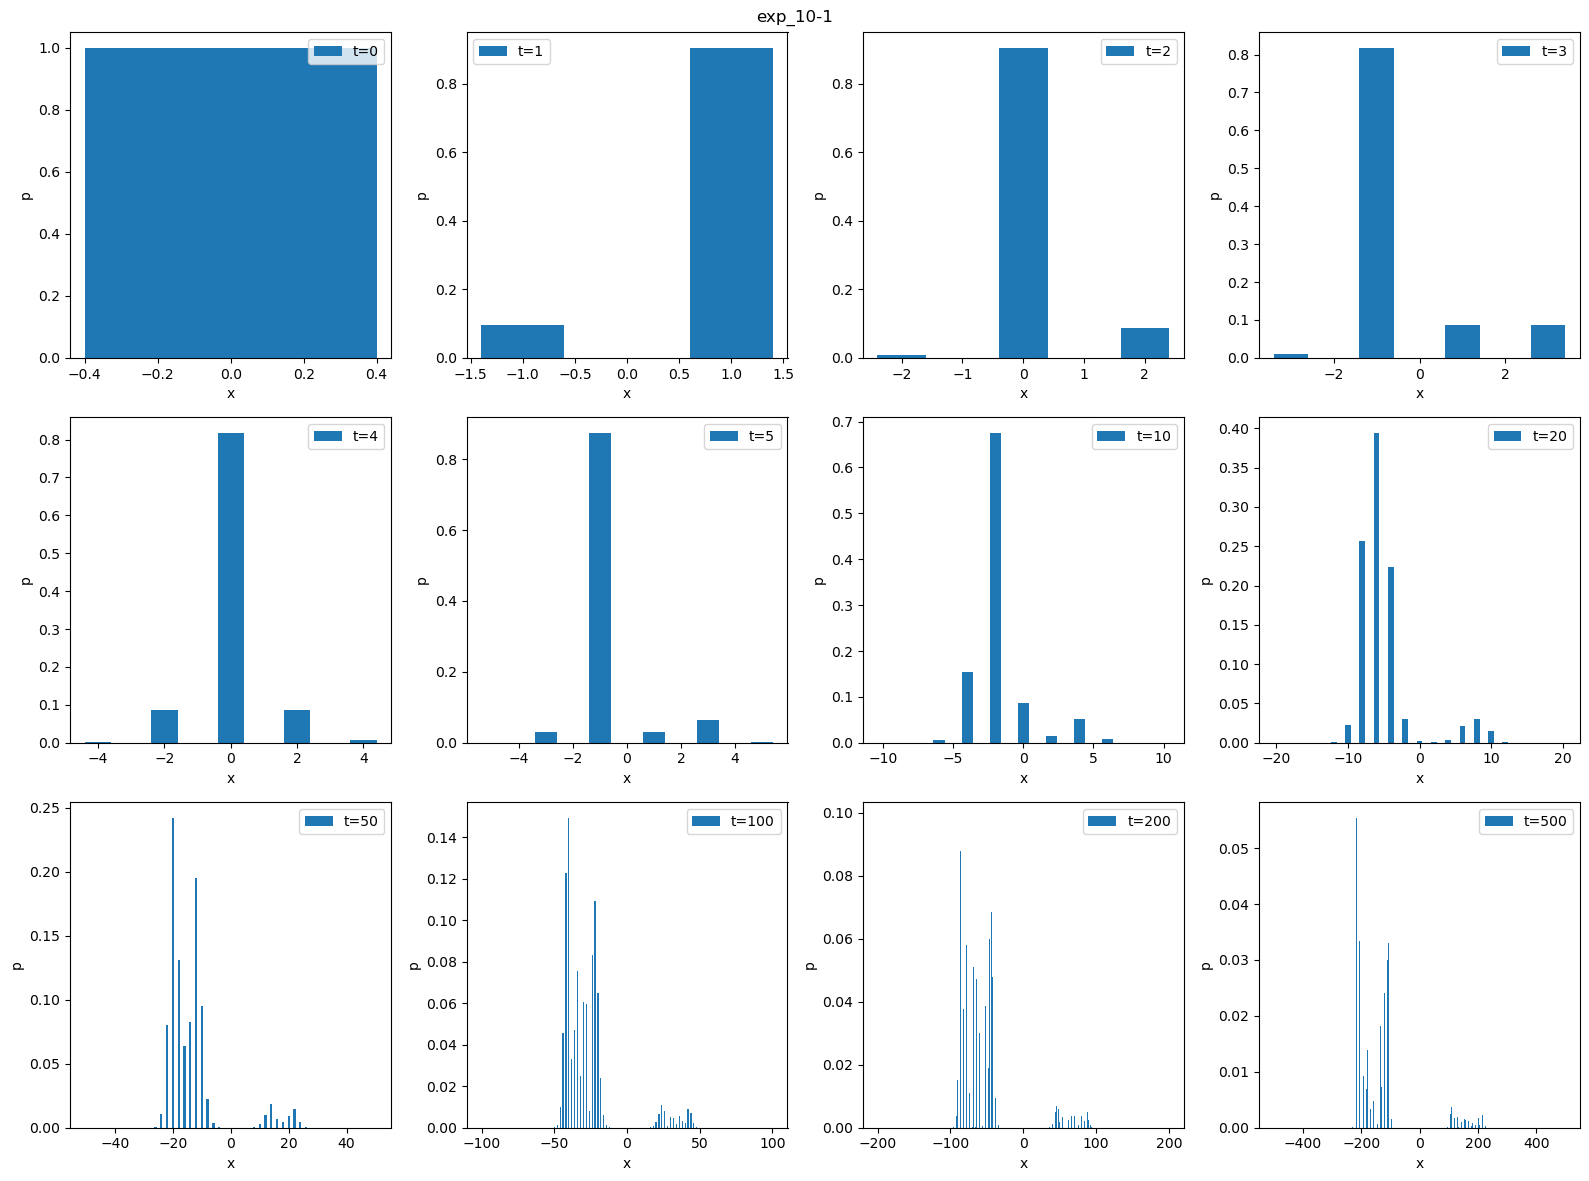

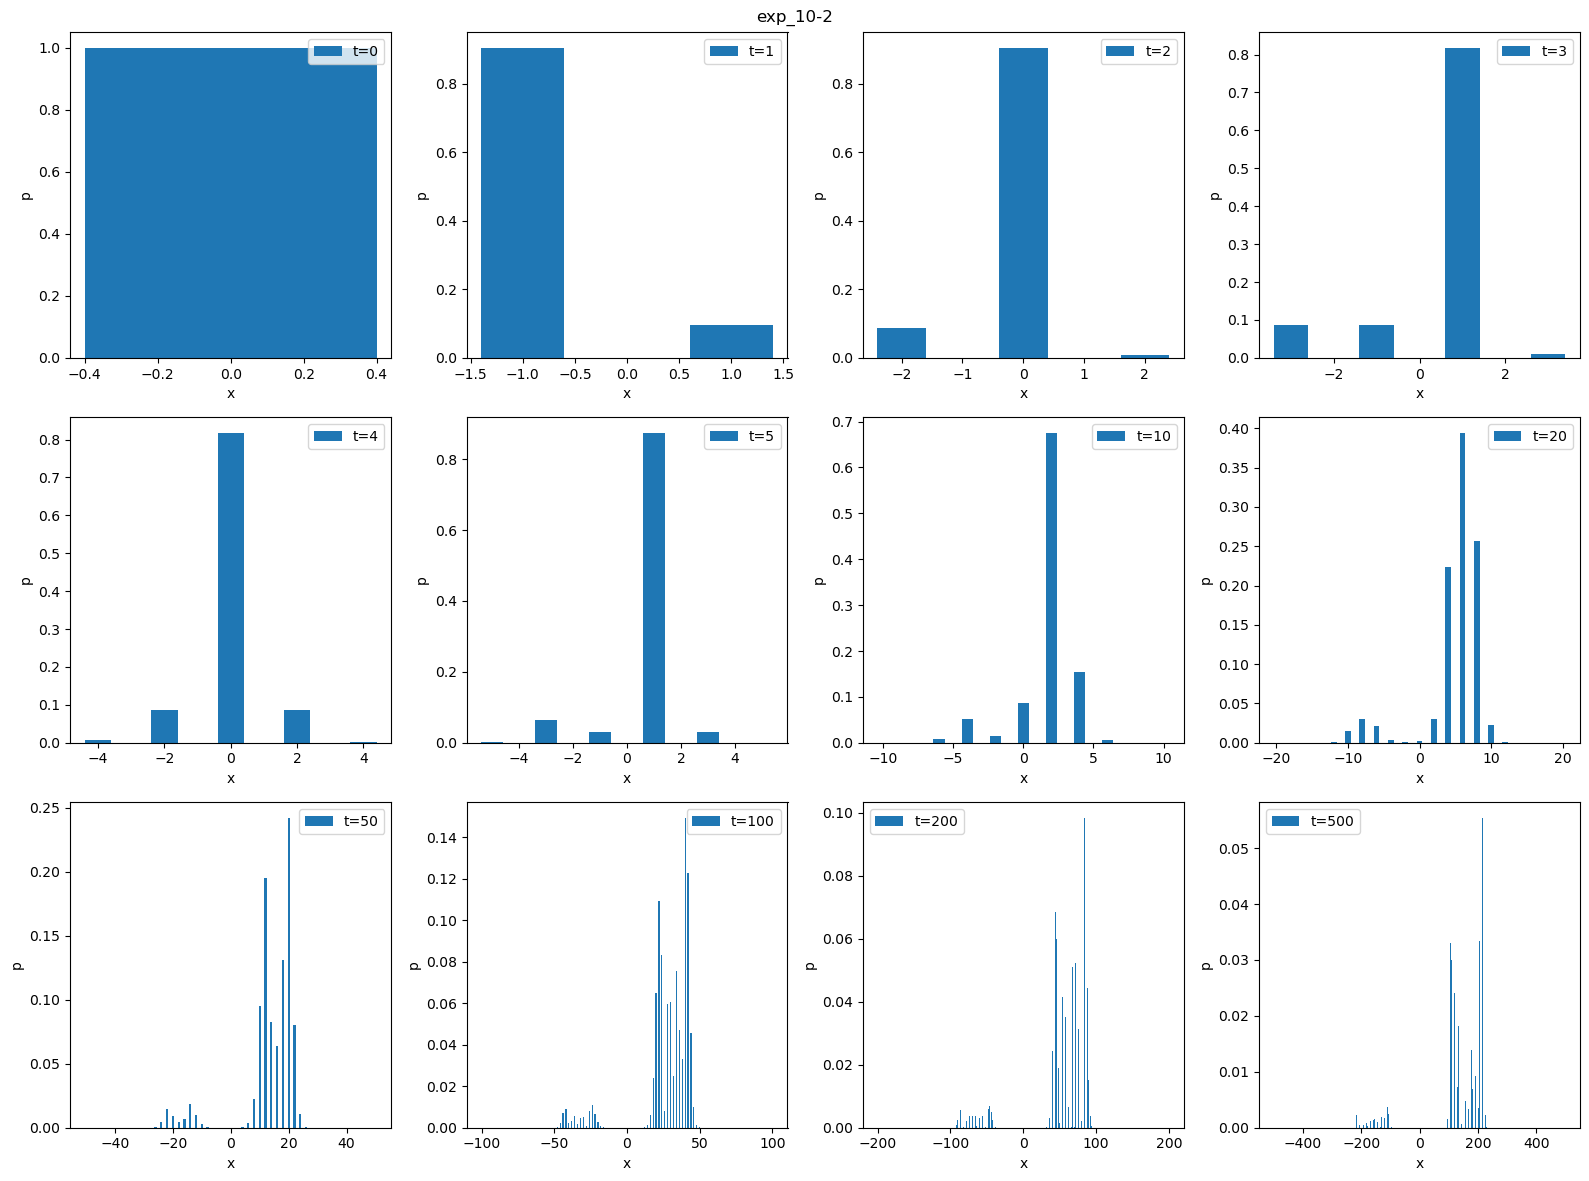

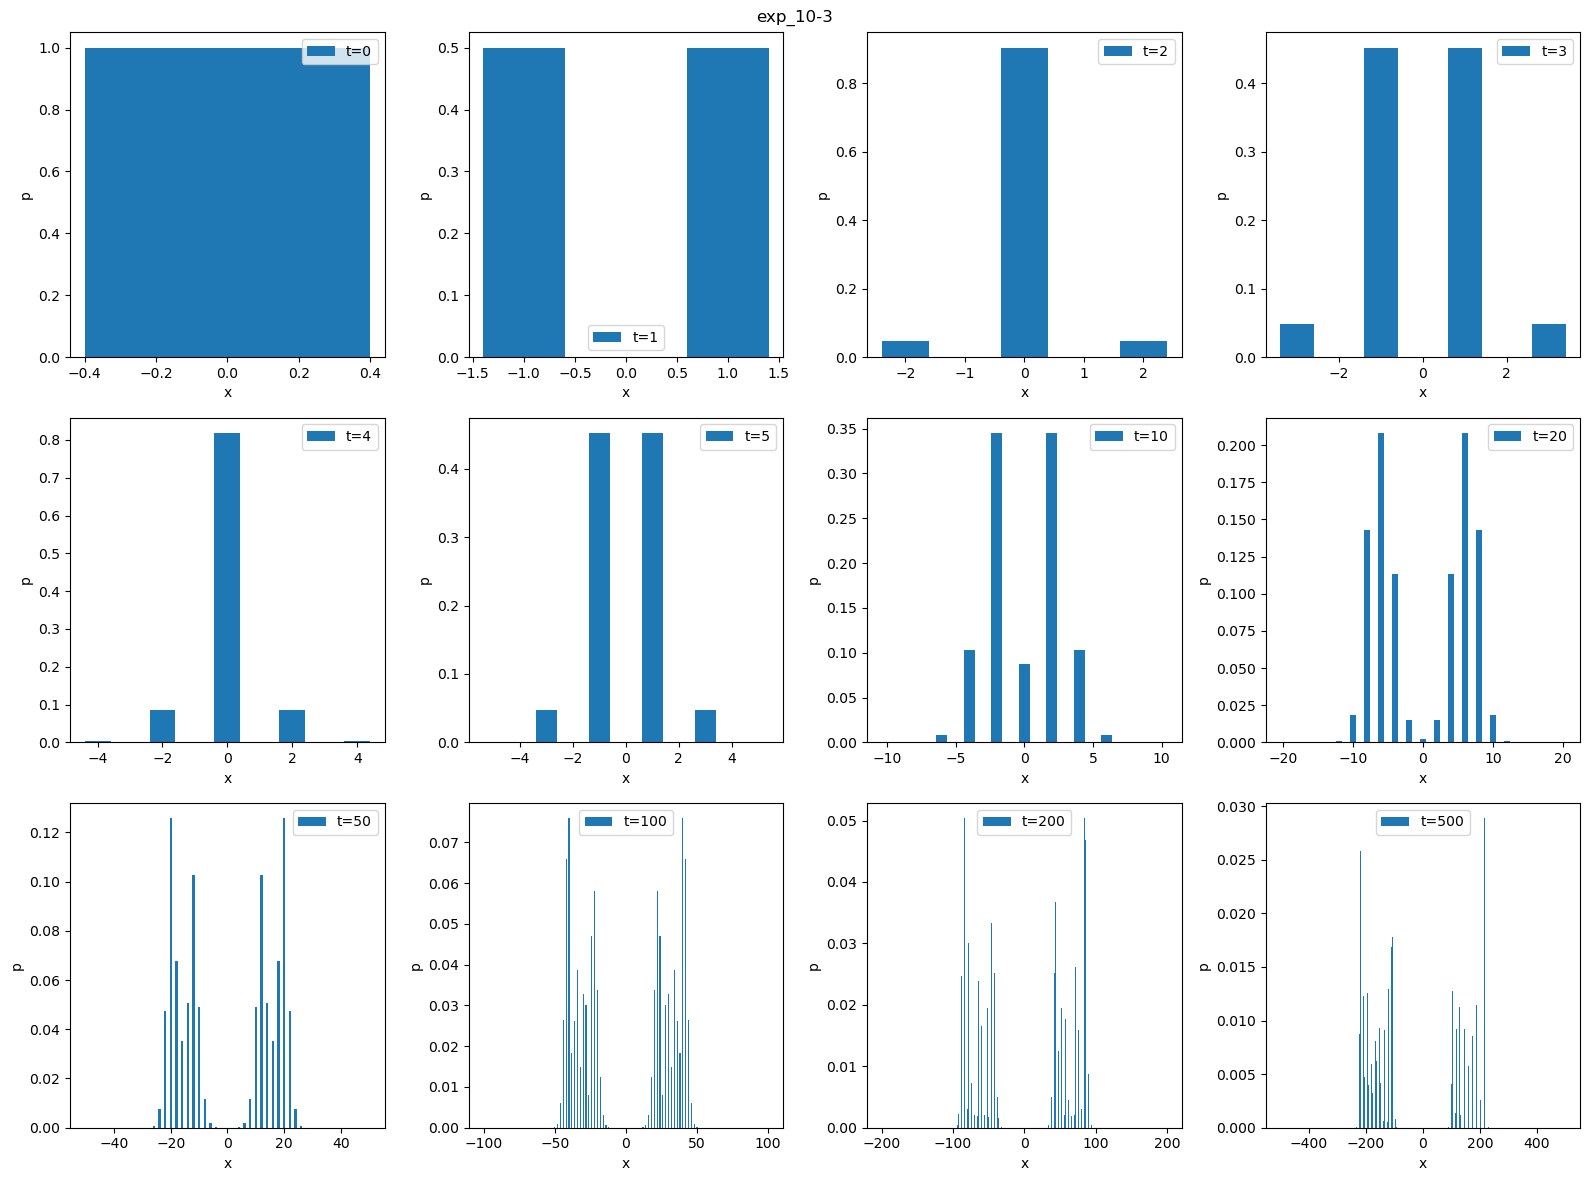

In [7]:
def exp_10(exp_code_chapter,PSY_init,description):
    """実験結果保存設定"""
    exp_code = "exp_10"
    folder_name, fig_title_name, file_name = quantumWalkUtility.save_setting(exp_code,exp_code_chapter,description)

    """実験"""
    # 最大時間発展T(t=0〜t=Tまで時間発展させる。t=Tを求めるにはT+1まで計算する必要があるため内部ではT+1まで計算している)
    T = 500
    # P,Q
    theta_list = [2 * np.pi / 5, 2 * np.pi / 5]
    P_list=[]
    Q_list=[]
    for theta in theta_list:
        P = np.array([[np.cos(theta), np.sin(theta)], [0, 0]], dtype=np.complex128)
        Q = np.array([[0, 0], [np.sin(theta), -np.cos(theta)]], dtype=np.complex128)
        P_list.append(P)
        Q_list.append(Q)

    P = np.array([[1, 0], [0, 0]], dtype=np.complex128)
    Q = np.array([[0, 0], [0, 1]], dtype=np.complex128)
    P_list.append(P)
    Q_list.append(Q)

    # 初期確率振幅ベクトル[時間×距離(-T〜T)×2次元ベクトル] x+1やx-1があるので、一つ余分に領域をとっておく
    PSY = np.zeros([T+1, 2 * (T + 1) + 1, 2], dtype=np.complex128)
    # PSY_init = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])
    PSY[0, 0] = PSY_init
    PSY = quantumWalkUtility.quantum_walk_1d_3phase(T, P_list, Q_list, PSY)

    """プロット及び保存"""
    # plotしたい時間t。
    plots_t = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500]
    # 1つのグラフ内に複数のグラフを表示させる場合、一列（行）に何個グラフを表示させるようにするか？
    plot_graph_num_by_axis_row = 3
    plot_graph_num_by_axis_col = 4
    # グラフの種類
    graph_type = "棒グラフ"
    quantumWalkUtility.do_plot(folder_name, fig_title_name, file_name, plots_t, plot_graph_num_by_axis_row,
                plot_graph_num_by_axis_col,
                False, graph_type, PSY)

PSY_init = np.array([1, 0])
exp_10(exp_code_chapter=1,PSY_init=PSY_init,description="確率分布の時間発展7")

PSY_init = np.array([0, 1])
exp_10(exp_code_chapter=2,PSY_init=PSY_init,description="確率分布の時間発展8")

PSY_init = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])
exp_10(exp_code_chapter=3,PSY_init=PSY_init,description="確率分布の時間発展9")


### 実験11

$\theta_1=\frac{\pi}{4}$

$\theta_2$を$\frac{\pi}{12}$ずつ変化

### 実験11-1
$\psi_0(0)=\left[\begin{matrix} 1 \\ 0 \end{matrix}\right]$,
$\psi_t(x)=\left[\begin{matrix} 0  \\ 0  \end{matrix}\right]$ $(x\neq0)$

### 実験11-2
$\psi_0(0)=\left[\begin{matrix} 0 \\ 1 \end{matrix}\right]$,
$\psi_t(x)=\left[\begin{matrix} 0  \\ 0  \end{matrix}\right]$ $(x\neq0)$

### 実験11-3
$\psi_0(0)=\left[\begin{matrix} \frac{1}{\sqrt{2}}  \\ \frac{i}{\sqrt{2}}  \end{matrix}\right]$
$\psi_t(x)=\left[\begin{matrix} 0\\ 0 \end{matrix}\right]$ $(x\neq0)$

t=500の時の確率分布
### 実験結果



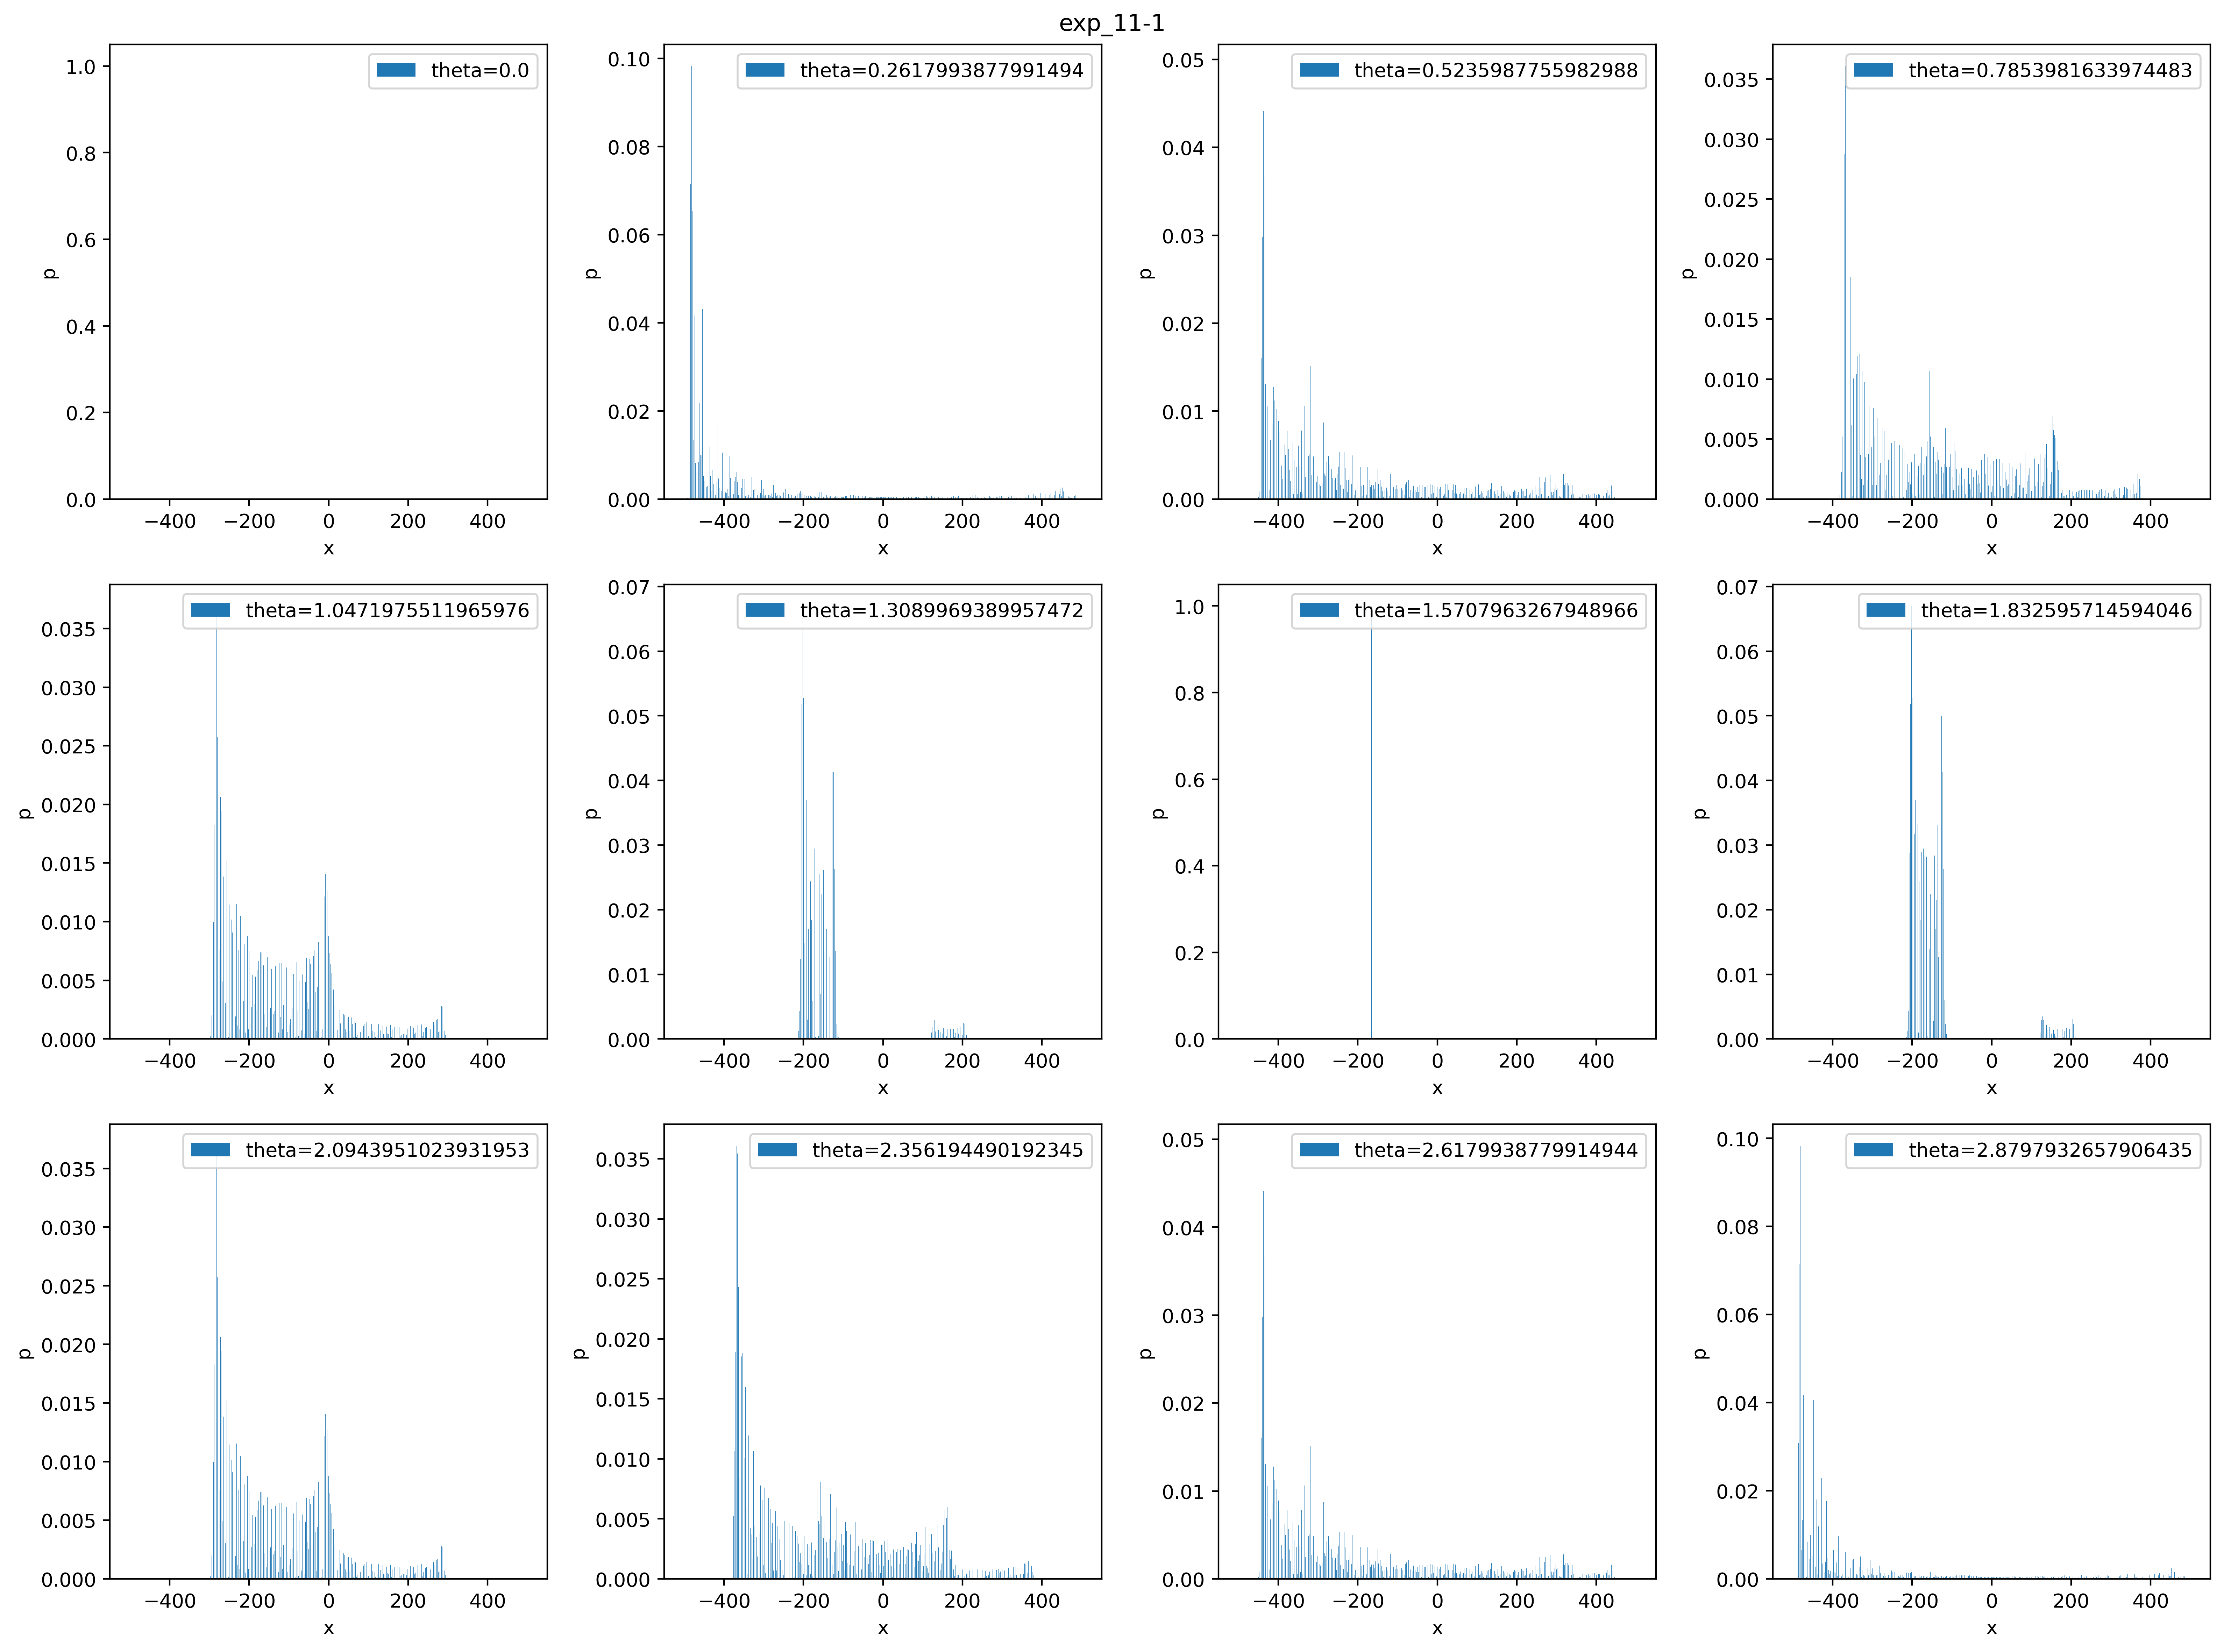

/Users/aki/PycharmProjects/special-study/quantumWalkUtility.py:61: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"{folder_name}/{file_name}", dpi=400, bbox_inches='tight')


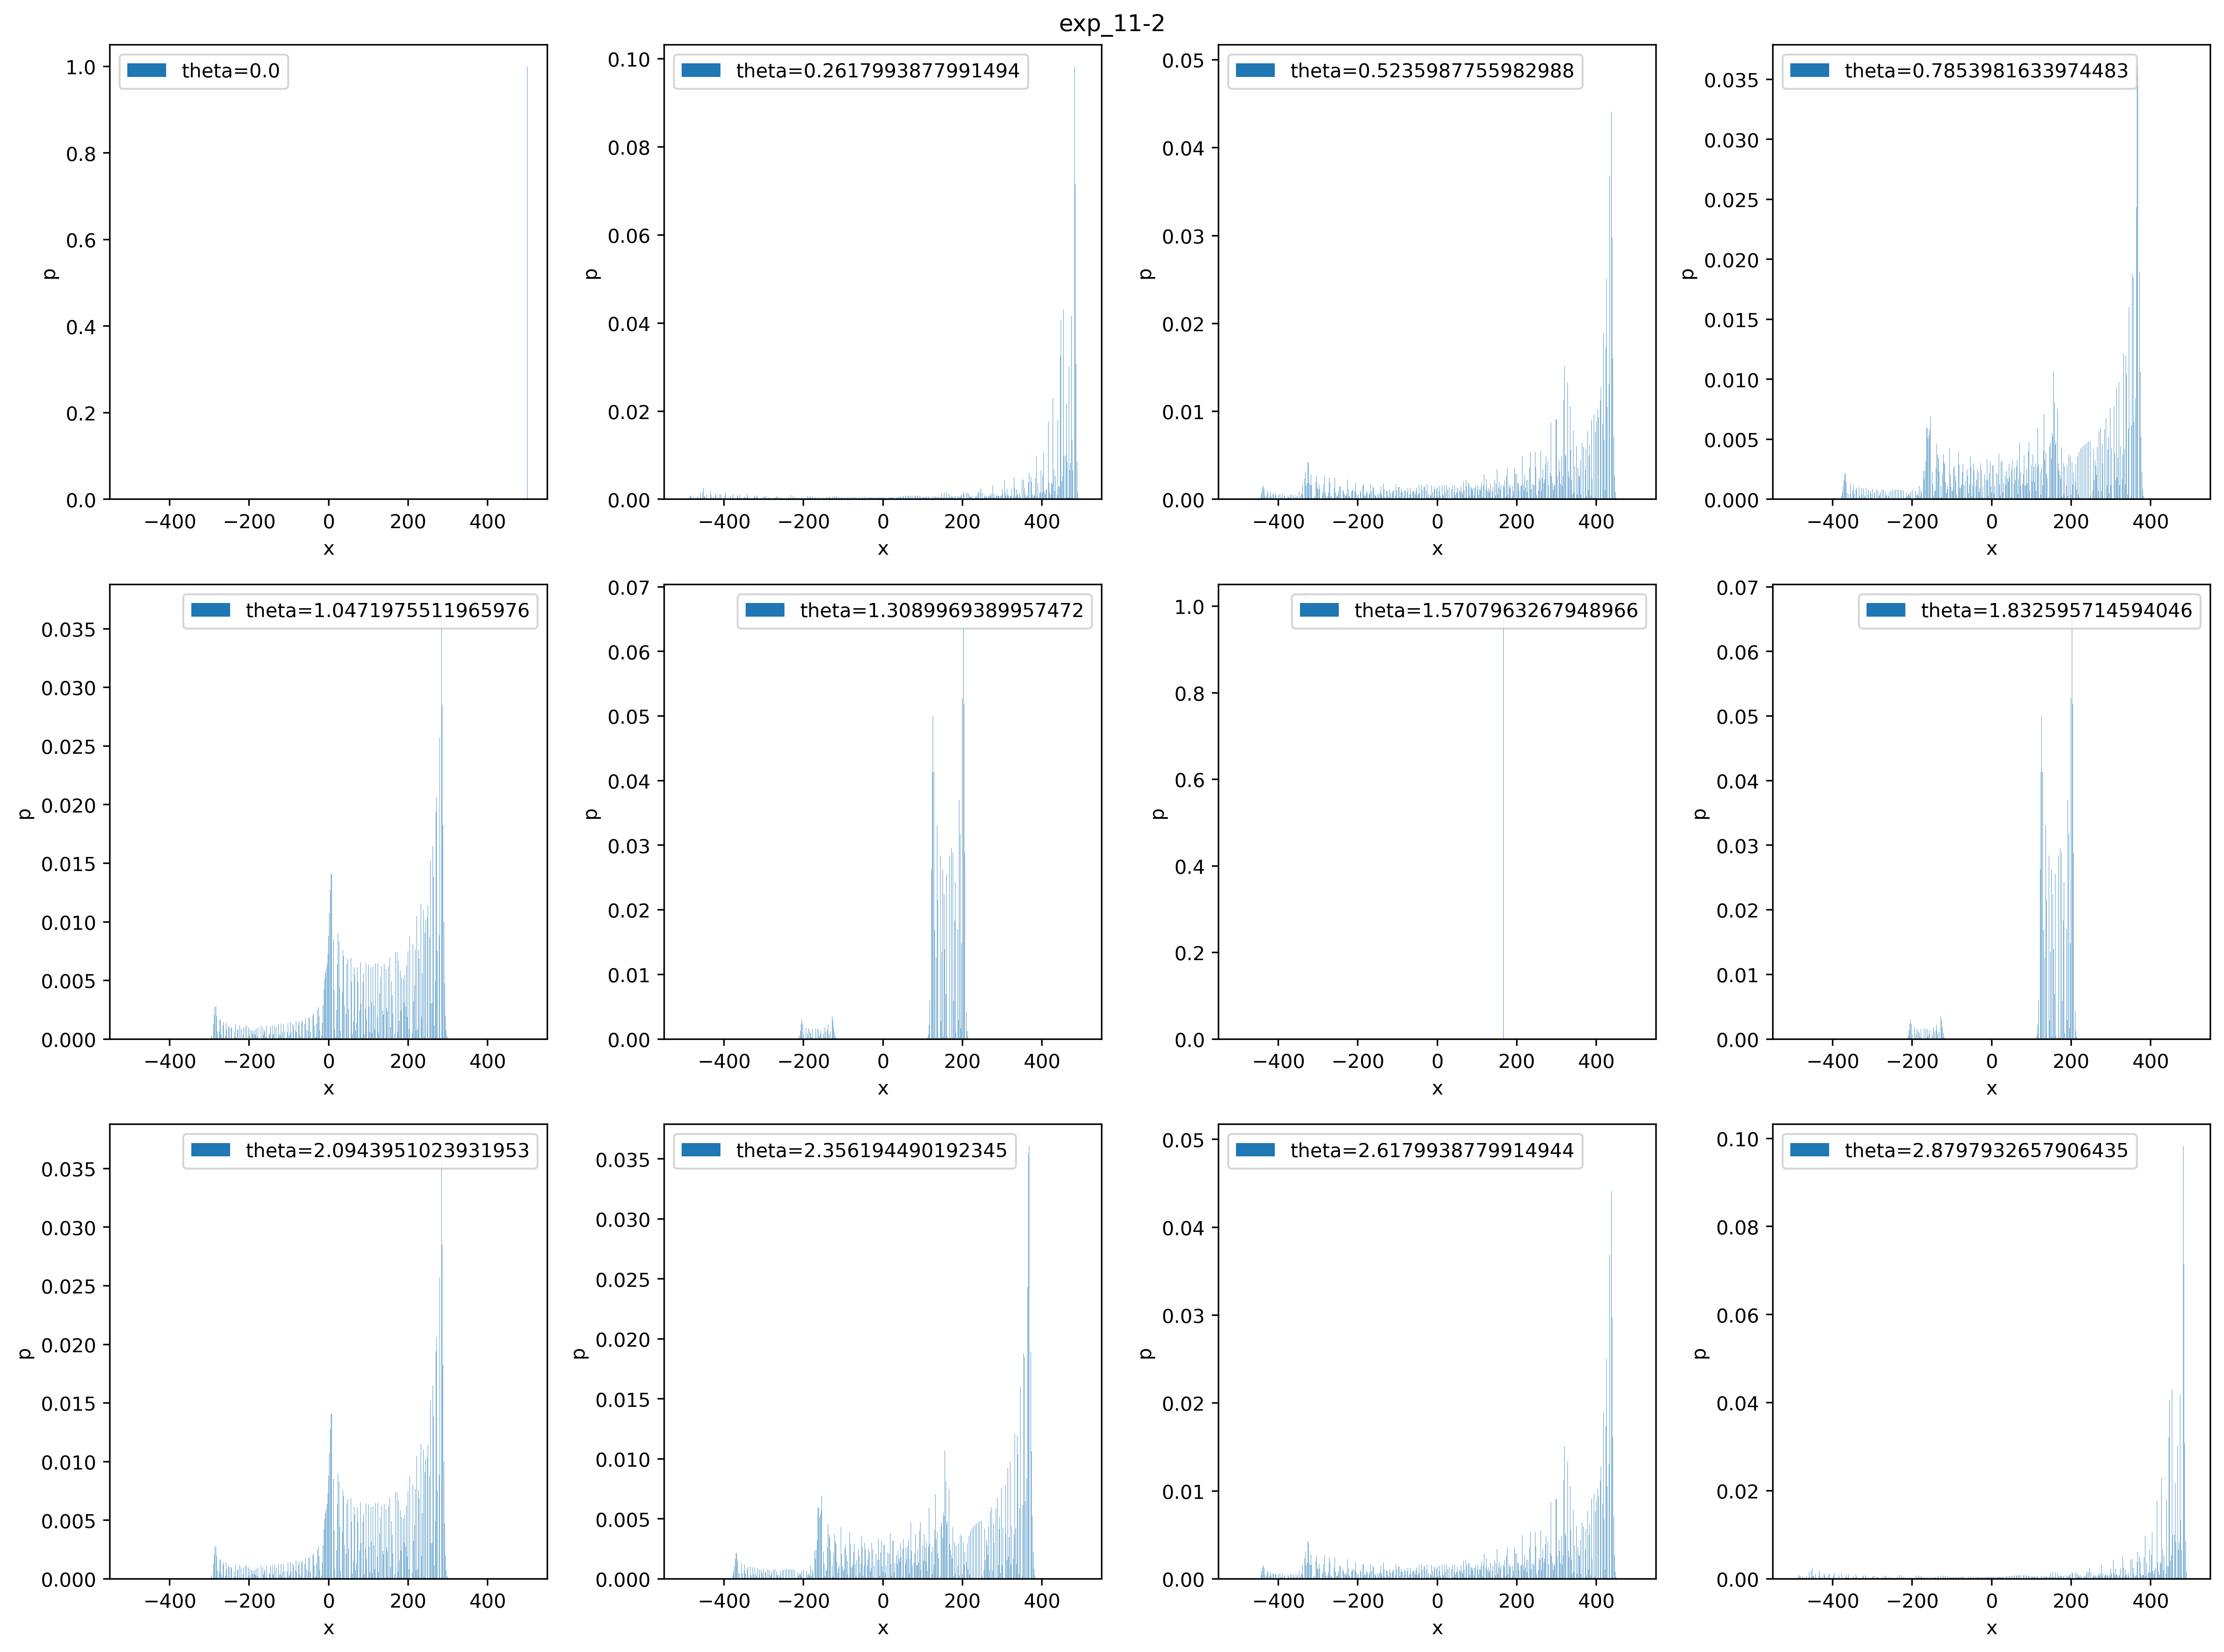

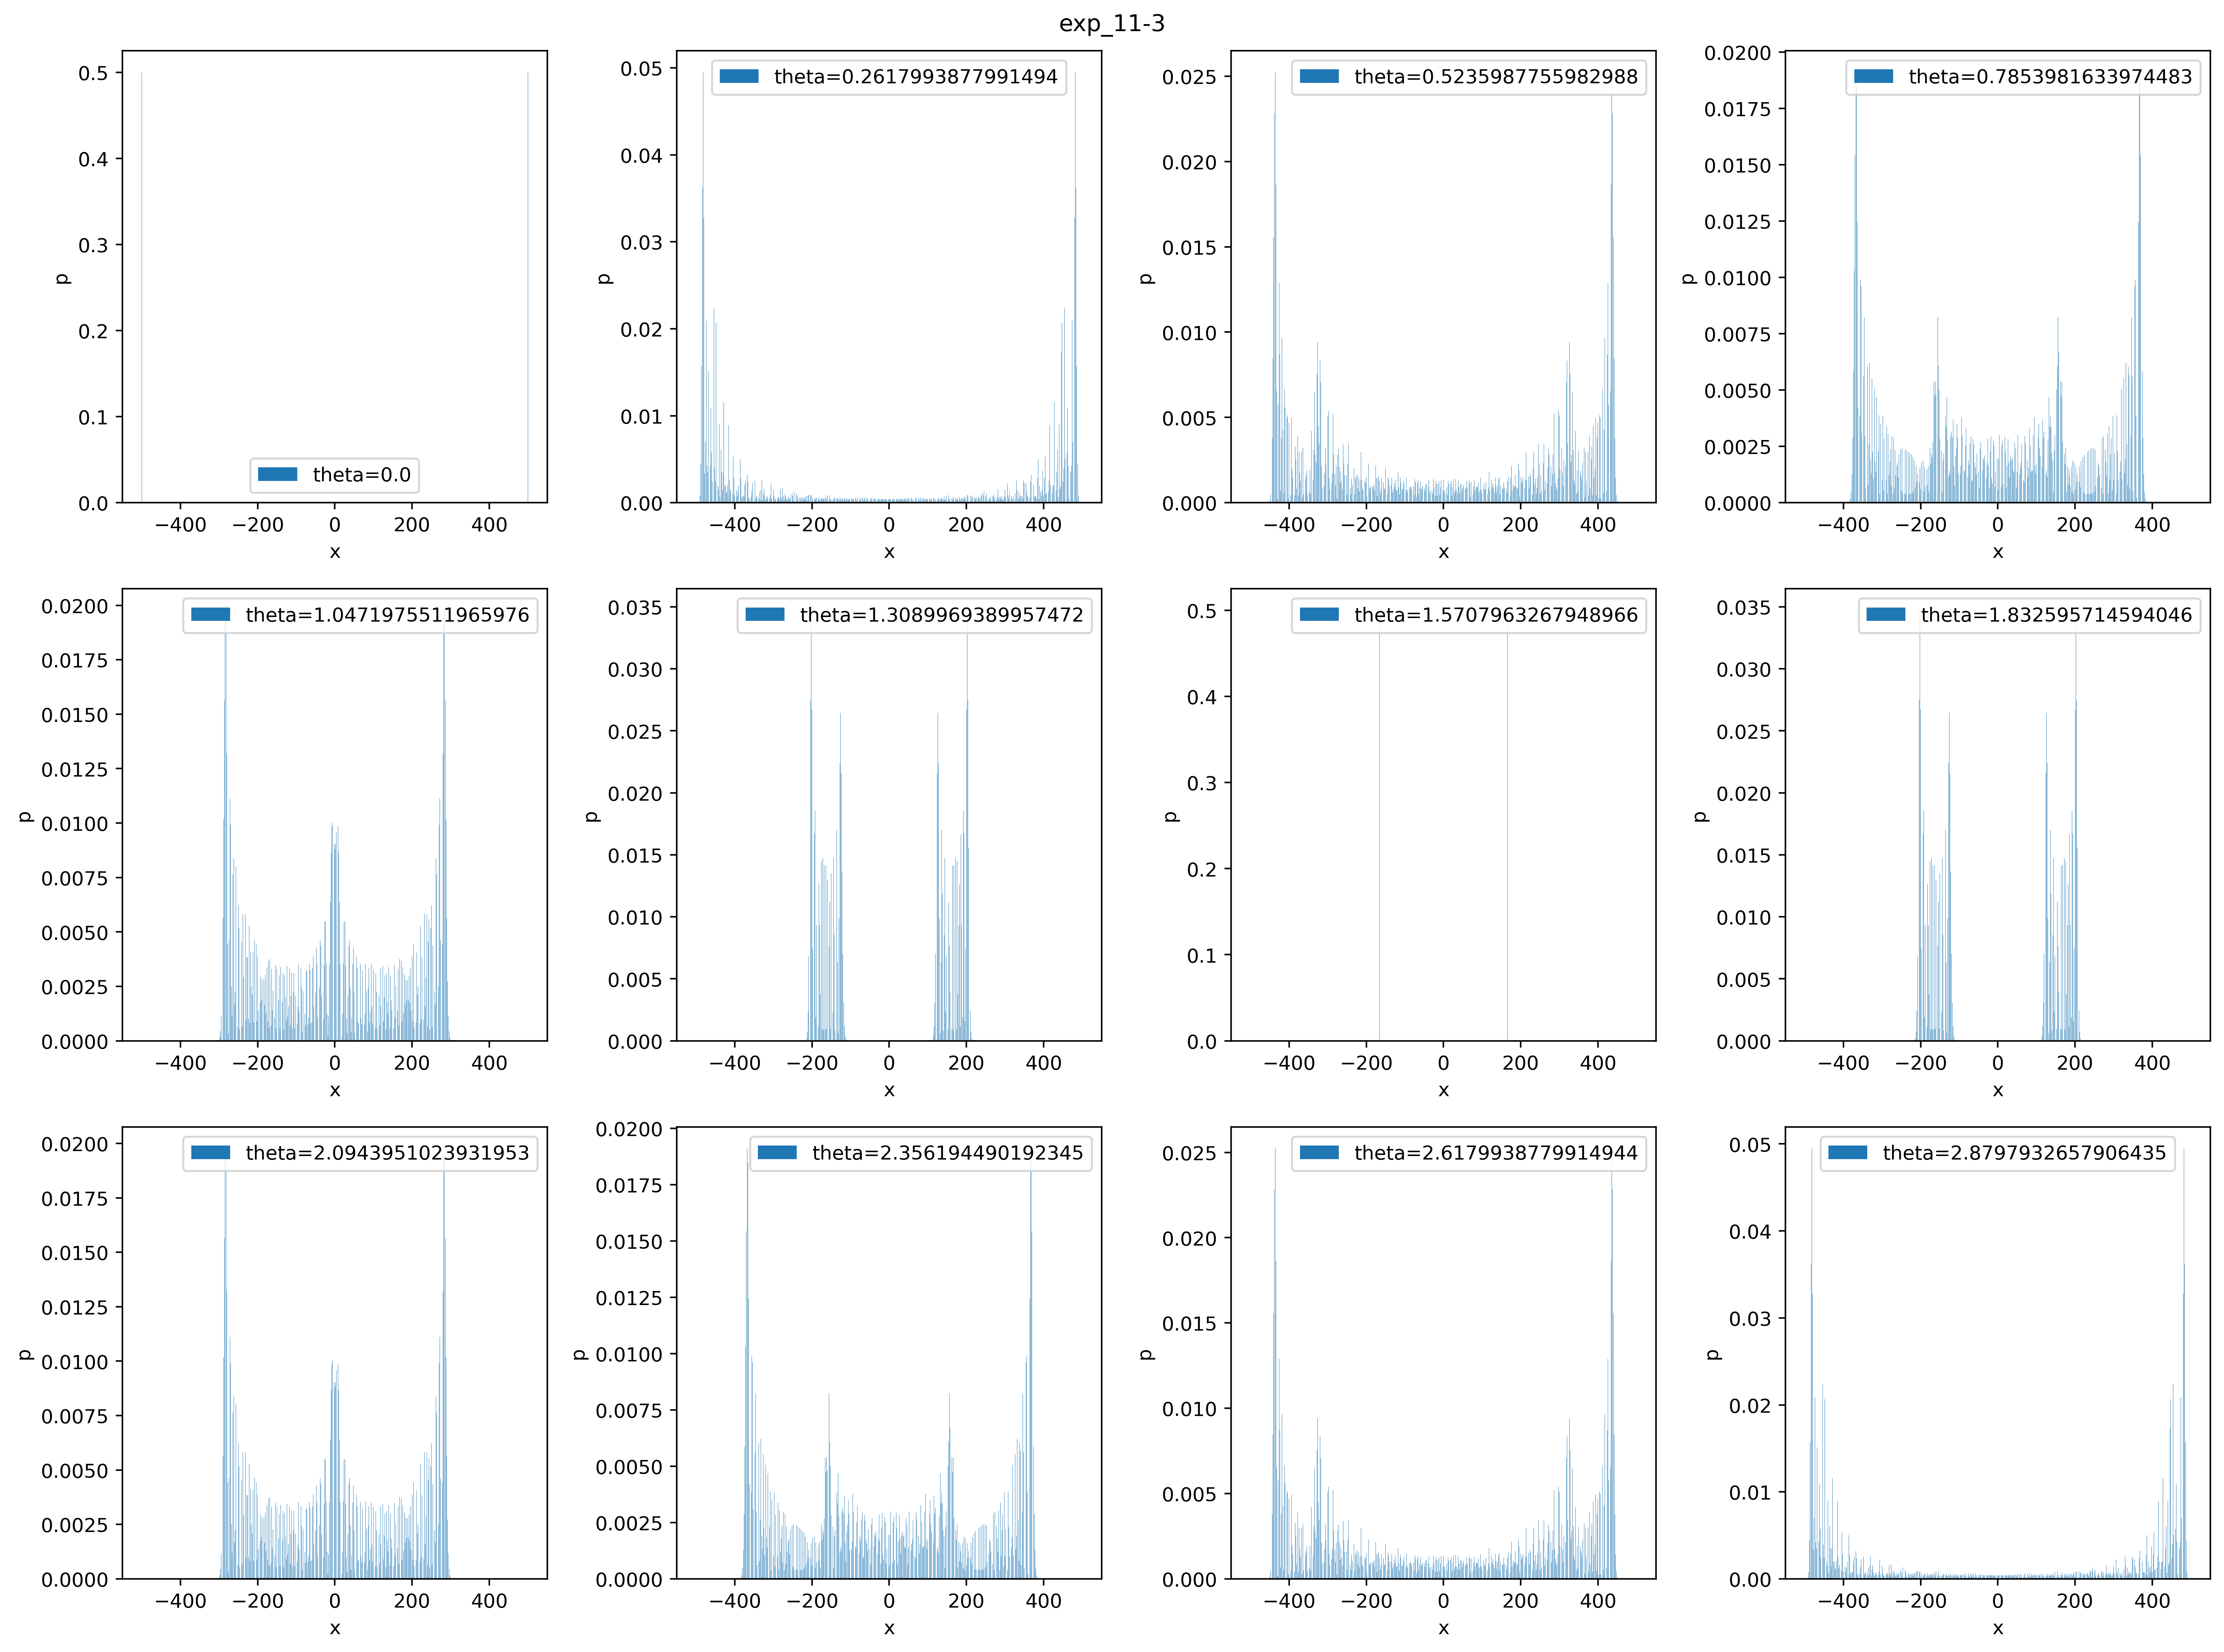

In [8]:
def exp_11(exp_code_chapter,PSY_init,description):
    """実験結果保存設定"""
    exp_code = "exp_11"
    folder_name, fig_title_name, file_name = quantumWalkUtility.save_setting(exp_code,exp_code_chapter,description)

    """実験"""
    # 最大時間発展T(t=0〜t=Tまで時間発展させる。t=Tを求めるにはT+1まで計算する必要があるため内部ではT+1まで計算している)
    T = 500
    # P,Q
    theta_list = [i * np.pi / 12 for i in range(0,12)]
    P_list=[]
    Q_list=[]
    
    for theta in theta_list:
        P = np.array([[np.cos(theta), np.sin(theta)], [0, 0]], dtype=np.complex128)
        Q = np.array([[0, 0], [np.sin(theta), -np.cos(theta)]], dtype=np.complex128)
        P_list.append(P)
        Q_list.append(Q)

    P_3 = np.array([[1, 0], [0, 0]], dtype=np.complex128)
    Q_3 = np.array([[0, 0], [0,1]], dtype=np.complex128)

    # 初期確率振幅ベクトル[時間×距離(-T〜T)×2次元ベクトル] x+1やx-1があるので、一つ余分に領域をとっておく
    PSY = np.zeros([T+1, 2 * (T + 1) + 1, 2], dtype=np.complex128)
    PSY[0, 0] = PSY_init
    PSY_list = quantumWalkUtility.quantum_walk_1d_3phase_theta_change(T, P_list, Q_list, P_3, Q_3, PSY, PSY_init, theta_list)

    """プロット及び保存"""
    # plotしたい時間t。
    plot_t = 500
    # 1つのグラフ内に複数のグラフを表示させる場合、一列（行）に何個グラフを表示させるようにするか？
    plot_graph_num_by_axis_row = 3
    plot_graph_num_by_axis_col = 4
    # グラフの種類
    graph_type = "棒グラフ"
    quantumWalkUtility.do_plot_PSY_list(folder_name, fig_title_name, file_name, plot_t, plot_graph_num_by_axis_row,
                     plot_graph_num_by_axis_col, graph_type, PSY_list, theta_list)

PSY_init = np.array([1, 0])
exp_11(exp_code_chapter=1,PSY_init=PSY_init,description="確率分布の行列依存性1")

PSY_init = np.array([0, 1])
exp_11(exp_code_chapter=2,PSY_init=PSY_init,description="確率分布の行列依存性2")

PSY_init = np.array([1/np.sqrt(2), 1j/np.sqrt(2)])
exp_11(exp_code_chapter=3,PSY_init=PSY_init,description="確率分布の行列依存性3")